# Bag-Of-Words Model

In [ ]:
import pandas as pd
import nltk
import heapq
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [ ]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
except:
    print("Mounting Failed.")

Mounted at /content/drive


In [ ]:
df = pd.read_csv('drive/My Drive/DL-Final-Project/Dataset/FINAL_DATASET_NOSTOPWORDS_2.csv',  lineterminator='\n')

In [ ]:
#create corpus-level word frequency dictionary
nltk.download('punkt')
wordfreq = {}
for index, sentence in df.iterrows():
    sentence = sentence[0]
    try:
      tokens = nltk.word_tokenize(sentence)
      for token in tokens:
        if token not in wordfreq.keys():
          wordfreq[token] = 1
        else:
          wordfreq[token] += 1
    except:
      pass

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#truncate dictionary to only include most frequent words - hyperparameter to adjust
most_freq = heapq.nlargest(50, wordfreq, key=wordfreq.get)

In [ ]:
#create Bag-Of-Words representation for each tweet in corpus
tweet_vectors = []
for index, tweet in df.iterrows():
    lab = tweet[1]
    tweet = tweet[0]
    try:
      tweet_tokens = nltk.word_tokenize(tweet)
      tweet_vec = []
      for token in most_freq:
        if token in tweet_tokens:
          tweet_vec.append(1)
        else:
          tweet_vec.append(0)
      tweet_vec.append(lab)
      tweet_vectors.append(tweet_vec)
    except:
      pass

In [ ]:
tweet_vectors = np.asarray(tweet_vectors)

In [ ]:
tweet_vectors.shape

(16941, 51)

In [ ]:
#Save Bag-Of-Words matrix
tweet_vectors
np.save("drive/My Drive/DL-Final-Project/Dataset/BoW.npy",tweet_vectors)

In [ ]:
data = np.load("drive/My Drive/DL-Final-Project/Dataset/BoW.npy")

In [ ]:
#create train-test split
X_train, X_test, y_train, y_test = train_test_split(data[:,:-1], data[:,-1], test_size=0.15, random_state=42, stratify=data[:,-1])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
#X_train, X_non, y_train, y_non = train_test_split(X_train, y_train, test_size=1, random_state=42)

In [ ]:
#fit logistic regression classifier to train set
clf = LogisticRegression(random_state=0, class_weight='balanced').fit(X_train, y_train)

In [ ]:
acc = clf.score(X_test,y_test)
print("Test Set Accuracy: " , round(acc,4)*100, " %")

Test Set Accuracy:  82.85  %


In [ ]:
y_preds = clf.predict(X_test)

In [ ]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

          -1       0.57      0.80      0.66       539
           1       0.94      0.84      0.88      2003

    accuracy                           0.83      2542
   macro avg       0.75      0.82      0.77      2542
weighted avg       0.86      0.83      0.84      2542



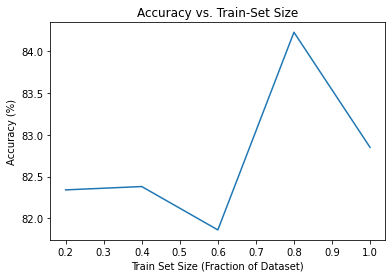

In [ ]:
accuracy_list = [82.34, 82.38, 81.86, 84.23, 82.85]
train_size_list = [0.2, 0.4, 0.6, 0.8, 1]

plt.plot(train_size_list, accuracy_list)
plt.title("Accuracy vs. Train-Set Size")
plt.xlabel("Train Set Size (Fraction of Dataset)")
plt.ylabel("Accuracy (%)")
plt.show()